# Hierarchical Mixture Model

An example of a hierarchical mixture model

In [55]:
import numpy as np
mu_true = 10.0
sigma_true = 1.0
out_mu_true = 2.0
out_sigma_true = 1.0
Q = 0.3
npts = 200
inliers = np.random.randn(int(npts*(1-Q))) * sigma_true + mu_true
outliers = np.random.randn(int(npts*(Q))) * out_sigma_true + out_mu_true
true = np.append(inliers, outliers)
yerr = np.ones(npts) * 2.5
yobs = true + np.random.randn(npts) * yerr

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


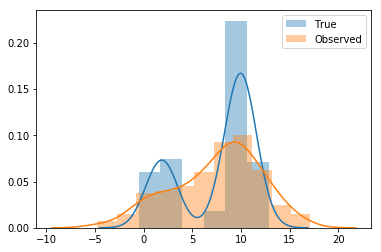

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(true, label='True')
ax = sns.distplot(yobs, label='Observed')
ax.legend()
plt.show()

In [48]:
code = '''
data {
    int N;
    real y[N];
    real yerr[N];
}
parameters {
    real mu[2];
    real<lower =0.001> sigma[2];
    real<lower = 0, upper = 13.8> y_true[N];
    real<lower = 0, upper = 1> theta;    
}
transformed parameters {
    real diff;
    diff = mu[2] - mu[1];
}
model {   
    y ~ normal(y_true, yerr); // Measurement uncertainty
    mu ~ normal(7.5, 10);
    sigma ~ lognormal(log(1.0), 0.3);
    theta ~ normal(0.5, 0.2);
    diff ~ lognormal(log(5.0), 1.0);
    for (n in 1:N)
        target += log_mix(theta,
                     normal_lpdf(y_true[n] | mu[1], sigma[1]),
                     normal_lpdf(y_true[n] | mu[2], sigma[2]));
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_77726a736e5b99f18d371b4493df7e69 NOW.


In [57]:
nchains = 4
data = {'N': npts,
       'y': yobs,
       'yerr': yerr}
fit = sm.sampling(data=data, iter=30000, chains=nchains)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


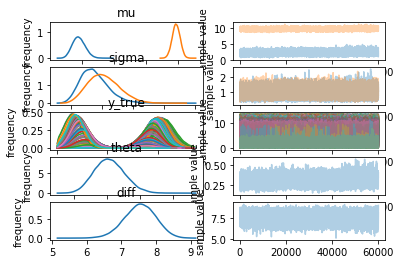

In [58]:
fit.plot()
plt.show()

In [59]:
print(fit)

Inference for Stan model: anon_model_77726a736e5b99f18d371b4493df7e69.
4 chains, each with iter=30000; warmup=15000; thin=1; 
post-warmup draws per chain=15000, total post-warmup draws=60000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]         2.28    0.03   0.49   1.39   1.94   2.26   2.61    3.3    207   1.01
mu[1]         9.82    0.02   0.31   9.22   9.61   9.82  10.03  10.41    242   1.01
sigma[0]      0.88  8.8e-3   0.23   0.51   0.72   0.86   1.02    1.4    680    1.0
sigma[1]      1.03  9.7e-3   0.25   0.59   0.85   1.01   1.19   1.56    671   1.01
y_true[0]     9.42    0.05   1.53   3.97    8.9   9.62  10.28  11.55   1121    1.0
y_true[1]    10.19  4.1e-3    1.0   8.25   9.54  10.18  10.82   12.2  60000    1.0
y_true[2]    10.59  4.1e-3   1.01   8.68   9.92  10.57  11.24  12.67  60000    1.0
y_true[3]     7.45    0.17   3.07   1.55   4.06   8.79   9.69  11.05    341   1.01
y_true[4]      8.5     0.1   2.44   2.09   8.23   9.24   9.9

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


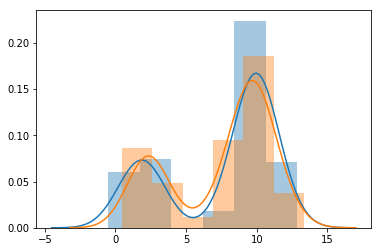

In [63]:
sns.distplot(true)
sns.distplot(fit['y_true'][1000, :])
